### Projeto de conclusão de Módulo Machine Learning 1

O projeto de finalização de módulo consiste num fluxo de trabalho completo com Machine Learning. Para desenvolvê-lo, vocês devem escolher um dataset no Kaggle e desenvolver de ponta a ponta uma solução que utilize aprendizado de máquina. Vamos ao passo a passo:

- 1. Escolha um Dataset no Kaggle:
    - Um bom dataset para o projeto contêm pelo menos 1000 linhas
- 2. Defina um problema de negócio a resolver com o Dataset (quero prever X, quero estimar Y)
- 3. Faça o tratamento dos dados e as transformações que achar pertinentes usando o Pandas
- 4. Determine a métrica de avaliação do seu modelo
- 5. Elabore a solução de Machine Learning, usando pelo menos 2 estimadores (para comparar os resultados)
- 6. Faça a otimização de hiperparametros para ambos os estimadores (usando o método mais adequado) e maximize a métrica de interesse.
- 7. Compare os modelos e escolha o melhor
- 8. Responda as perguntas:
    -  Meu modelo resolve adequadamente o problema proposto?
    -  Meu modelo pode ser colocado em produção?
-  9. Apresente para a turma e para o professor

A apresentação é feita em formato livre, e tem duração a combinar, dependendo da quantidade de grupos na turma.

### Alunos: Assuero Meira, Leandro Republicano, Leticia da Luz e Orestes Dos Santos

### Dataset: Heart Attack Risk Prediction Dataset:

**Link:** https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset

**Objetivo:** Desenvolver um modelo preditivo capaz de antecipar o risco de um indivíduo sofrer um ataque cardíaco.

**Resumo do Kaggle:** O Conjunto de Dados de Previsão de Risco de Ataque Cardíaco serve como um recurso valioso para explorar as dinâmicas intricadas da saúde do coração e seus preditores. Os ataques cardíacos, ou infartos do miocárdio, continuam sendo um problema significativo de saúde global, exigindo uma compreensão mais profunda de seus precursores e potenciais fatores mitigadores. Este conjunto de dados encapsula uma variedade diversificada de atributos, incluindo idade, níveis de colesterol, pressão sanguínea, hábitos de fumo, padrões de exercício, preferências dietéticas e muito mais, com o objetivo de elucidar a complexa interação dessas variáveis na determinação da probabilidade de um ataque cardíaco. Ao empregar análises preditivas e aprendizado de máquina neste conjunto de dados, pesquisadores e profissionais de saúde podem trabalhar em direção a estratégias proativas para prevenção e gerenciamento de doenças cardíacas. O conjunto de dados representa um testemunho dos esforços coletivos para aprimorar nossa compreensão da saúde cardiovascular e pavimentar o caminho para um futuro mais saudável.

In [ ]:
#Importação de bibliotecas
import pandas as pd
import numpy as np

In [ ]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caminho do arquivo
caminho_csv = '/content/drive/MyDrive/projeto_ML_1/df_IAM_risco_final.csv'

In [ ]:
# Carregando o arquivo CSV usando Pandas
df_risco_infarto_ml = pd.read_csv(caminho_csv)

In [ ]:
df_risco_infarto_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Stress Level        

In [ ]:
#Caso haja erro ao importar category_encoders
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
#Importando a função train_test_split para divisão dos dados
from sklearn.model_selection import train_test_split

# Importanto pipeline para encadear múltiplas etapas de processamento
from sklearn.pipeline import Pipeline

#Importando a classe ColumnTransformer para realizar diferentes transformações em conjuntos de dados numéricos e categóricos
from sklearn.compose import ColumnTransformer

# Importando classes necessárias para pré-processamento
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
from category_encoders import TargetEncoder

# Para calcular os pesos das classes
from sklearn.utils.class_weight import compute_class_weight

#Importando estimadores, mudar se for regressão
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Importando a classe StratifiedKFold e a função cross_validate para realizar a validação cruzada
from sklearn.model_selection import StratifiedKFold

#Seleção dos melhores parâmetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Avaliação do modelo de classificação
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

#Para seleção de variáveis
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
# Separando as features (x) e a variável alvo(y)
X = df_risco_infarto_ml.drop('Heart Attack Risk', axis =1)
y = df_risco_infarto_ml['Heart Attack Risk']

In [ ]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Verificando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6134, 19) (6134,) (2629, 19) (2629,)


In [ ]:
X_train.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Systolic Pressure,Diastolic Pressure
2963,77,Male,346,74,0,0,1,0,1,2.679789,Average,0,9,5.744752,35.543887,143,6,99,76
599,59,Female,287,88,0,1,1,1,0,11.941754,Average,1,10,3.271041,32.192374,385,4,162,110
45,33,Male,185,79,0,1,1,1,0,16.160481,Healthy,0,7,11.083843,37.209005,675,6,120,63
1444,74,Female,352,89,0,0,1,0,1,3.059548,Unhealthy,1,5,4.135487,37.282642,799,1,101,92
1652,29,Male,260,50,1,0,1,0,0,19.362863,Average,1,3,9.900539,32.365666,36,5,90,106


In [ ]:
X_test.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Systolic Pressure,Diastolic Pressure
1226,65,Male,340,75,0,0,1,1,1,9.870784,Healthy,1,7,5.567363,35.561283,315,0,124,68
7903,77,Male,361,46,1,0,1,0,0,2.763339,Healthy,0,5,9.964626,26.638707,471,3,177,104
1559,70,Male,341,73,1,1,1,1,1,16.325463,Healthy,1,6,9.151772,23.927789,104,1,156,84
3621,47,Male,392,72,0,1,1,1,0,5.161941,Average,0,8,8.435153,29.480917,201,6,155,75
7552,63,Male,173,98,0,0,1,0,1,3.681472,Unhealthy,0,1,8.841575,21.110044,638,2,103,109


In [ ]:
#Subsituição de valores para coluna 'Diet'
mapeamento = {
    'Healthy': 0,  # Bom: sem risco associado
    'Average': 1,  # Médio: risco moderado
    'Unhealthy': 2 # Ruim: risco alto
}

In [ ]:
# Aplicando o mapeamento
X_train['Diet'] = X_train['Diet'].map(mapeamento)
X_test['Diet'] = X_test['Diet'].map(mapeamento)

In [ ]:
X_test['Diet'].value_counts()

Diet
2    895
1    873
0    861
Name: count, dtype: int64

In [ ]:
X_train['Diet'].value_counts()

Diet
0    2099
1    2039
2    1996
Name: count, dtype: int64

In [ ]:
#Verificando a distribuição no Target
y_train.value_counts()

Heart Attack Risk
0    3933
1    2201
Name: count, dtype: int64

## Lidando com o desbalanceamento dos dados

In [ ]:
#Atribuindo pesos
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))
weights_dict

{0: 0.779811848461734, 1: 1.3934575193094048}

## Métrica
**Recall Macro**
- Descrição: O recall macro é calculado encontrando o recall individual de cada classe e, em seguida, calculando a média aritmética desses valores. Cada classe contribui igualmente para a média final, independentemente do seu tamanho ou frequência no conjunto de dados.
- Impacto: Isso significa que o desempenho do modelo em classes minoritárias tem tanto peso quanto em classes majoritárias, tornando essa métrica particularmente útil quando você quer garantir que o modelo não está favorecendo as classes mais frequentes à custa das menos frequentes.
- Uso recomendado: Ideal para situações em que todas as classes são igualmente importantes para o problema em questão, como em problemas de saúde onde diagnosticar uma doença rara é tão crucial quanto diagnosticar uma comum.

## Pipeline: LogisticRegression

Hiperparâmetros:
-  **classifier__C':** O hiperparâmetro C é um valor numérico positivo que controla o inverso da força da regularização no modelo. Quanto menor o valor de C, maior a regularização. Isso significa que ao reduzir o valor de C, o modelo aumenta a penalidade aplicada aos coeficientes, o que pode levar a um modelo menos complexo e com maior generalização.
- **classifier__penalty':** O hiperparâmetro penalty especifica o tipo de norma usada na regularização.A regularização L2 adiciona 'penalidade igual ao quadrado da magnitude dos coeficientes' à função de perda. Assim, a regularização L2 é um método usado para evitar o sobreajuste em modelos de aprendizado de máquina



In [ ]:
# Identificando suas colunas categóricas e numéricas
categorical_features = ['Sex']
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Diet', 'Stress Level', 'Sedentary Hours Per Day',
                    'BMI','Triglycerides', 'Physical Activity Days Per Week', 'Systolic Pressure', 'Diastolic Pressure']

# Lista de colunas que não serão transformadas
unchanged_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1, 10, 100],
    'classifier__penalty': ['l2']
}

#GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Cholesterol',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Exercise '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week',
                                                                          'Diet',
                                                                          'Stress '
                                                                          'Level',
                                                                          'Sedentary '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Day',
                                                                          'BMI',
                                                                          'Triglycerides',
                                                                          'Physical '
                                                                          '...
                                                                         'passthrough',
                                                                         ['Diabetes',
                                                                          'Family '
                                                                          'History',
                                                                          'Smoking',
                                                                          'Obesity',
                                                                          'Alcohol '
                                                                          'Consumption',
                                                                          'Previous '
                                                                          'Heart '
                                                                          'Problems'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight={0: 0.779811848461734,
                                                                         1: 1.3934575193094048}))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2,
                                           0.5, 1, 10, 100],
                         'classifier__penalty': ['l2']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}
Melhor score de validação cruzada: 0.500


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Acurácia: 0.4895
Precisão: 0.4875
Recall: 0.4864
F1-score: 0.4778


## Pipeline: LogisticRegression (modificando o encoding)

In [ ]:
# Identificando suas colunas categóricas e numéricas
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems', 'Diet',
                        'Stress Level']

numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day',
                    'BMI','Triglycerides', 'Physical Activity Days Per Week', 'Systolic Pressure', 'Diastolic Pressure']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__C': [0.001, 0.002, 0.003],
    'classifier__penalty': ['l2']
}

#GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Cholesterol',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Exercise '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week',
                                                                          'Stress '
                                                                          'Level',
                                                                          'Sedentary '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Day',
                                                                          'BMI',
                                                                          'Triglycerides',
                                                                          'Physical '
                                                                          'Activit...
                                                                         ['Sex',
                                                                          'Diabetes',
                                                                          'Family '
                                                                          'History',
                                                                          'Smoking',
                                                                          'Obesity',
                                                                          'Alcohol '
                                                                          'Consumption',
                                                                          'Previous '
                                                                          'Heart '
                                                                          'Problems',
                                                                          'Diet',
                                                                          'Stress '
                                                                          'Level'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight={0: 0.779811848461734,
                                                                         1: 1.3934575193094048}))]),
             param_grid={'classifier__C': [0.001, 0.002, 0.003],
                         'classifier__penalty': ['l2']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}
Melhor score de validação cruzada: 0.500


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.4975
Precisão: 0.4958
Recall: 0.4955
F1-score: 0.4861


## Pipeline: LogisticRegression (escolha de variáveis)

In [ ]:
# Identificando suas colunas categóricas e numéricas
categorical_features = ['Sex']
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Diet', 'Stress Level', 'Sedentary Hours Per Day',
                    'BMI','Triglycerides', 'Physical Activity Days Per Week', 'Systolic Pressure', 'Diastolic Pressure']

# Lista de colunas que não serão transformadas
unchanged_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=12)),
    ('classifier', LogisticRegression(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__C': [0.001],
    'classifier__penalty': ['l2']
}

#GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Cholesterol',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Exercise '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week',
                                                                          'Diet',
                                                                          'Stress '
                                                                          'Level',
                                                                          'Sedentary '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Day',
                                                                          'BMI',
                                                                          'Triglycerides',
                                                                          'Physical '
                                                                          '...
                                                                         ['Diabetes',
                                                                          'Family '
                                                                          'History',
                                                                          'Smoking',
                                                                          'Obesity',
                                                                          'Alcohol '
                                                                          'Consumption',
                                                                          'Previous '
                                                                          'Heart '
                                                                          'Problems'])])),
                                       ('feature_selection', SelectKBest(k=12)),
                                       ('classifier',
                                        LogisticRegression(class_weight={0: 0.779811848461734,
                                                                         1: 1.3934575193094048}))]),
             param_grid={'classifier__C': [0.001],
                         'classifier__penalty': ['l2']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}
Melhor score de validação cruzada: 0.502


In [ ]:
# Ajusta o preprocessor ao conjunto de dados
preprocessor.fit(X_train)

# Obtém os novos nomes das colunas após a transformação
new_feature_names = preprocessor.get_feature_names_out()
new_feature_names

array(['num__Age', 'num__Cholesterol', 'num__Heart Rate',
       'num__Exercise Hours Per Week', 'num__Diet', 'num__Stress Level',
       'num__Sedentary Hours Per Day', 'num__BMI', 'num__Triglycerides',
       'num__Physical Activity Days Per Week', 'num__Systolic Pressure',
       'num__Diastolic Pressure', 'cat__Sex_1', 'cat__Sex_2',
       'passthrough__Diabetes', 'passthrough__Family History',
       'passthrough__Smoking', 'passthrough__Obesity',
       'passthrough__Alcohol Consumption',
       'passthrough__Previous Heart Problems'], dtype=object)

In [ ]:
# Acessando o passo 'feature_selection' do pipeline no melhor modelo
selected_features = grid_search.best_estimator_.named_steps['feature_selection'].get_support()

# Obtendo os nomes das variáveis
selected_feature_names = new_feature_names[selected_features]
selected_feature_names

array(['num__Age', 'num__Cholesterol', 'num__Diet', 'num__Stress Level',
       'num__BMI', 'num__Triglycerides',
       'num__Physical Activity Days Per Week', 'num__Systolic Pressure',
       'cat__Sex_1', 'cat__Sex_2', 'passthrough__Obesity',
       'passthrough__Alcohol Consumption'], dtype=object)

## Pipeline: KNN
Hiperparâmetros:
-  **classifier__n_neighbors:** Especifica o número de vizinhos mais próximos a serem considerados para a votação da classe.
- **classifier__weights:** Determina o peso dado aos vizinhos na votação. 'uniform' significa que todos os vizinhos têm o mesmo peso, e 'distance' dá mais peso aos vizinhos mais próximos, o que pode ser útil em casos de desbalanceamento de classes ou quando os pontos de dados não são uniformemente distribuídos.
- **classifier__algorithm:**O algoritmo usado para computar os vizinhos mais próximos. Cada algoritmo tem suas vantagens, dependendo da estrutura dos dados. 'ball_tree' e 'kd_tree' são eficientes para conjuntos de dados de grandes dimensões, enquanto 'brute' usa uma abordagem de força bruta que pode ser eficiente para conjuntos de dados menores.
- **classifier__metric:**Métrica usada para calcular a distância entre os pontos. 'euclidean' é a mais comum para dados genéricos, 'manhattan' pode ser melhor para dados com muitas variáveis discretas ou binárias, e 'minkowski' é uma generalização que pode ajustar-se a diferentes tipos de dados dependendo de um parâmetro adicional.

In [ ]:
# Identificando suas colunas categóricas e numéricas
categorical_features = ['Sex']
numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Diet', 'Stress Level', 'Sedentary Hours Per Day',
                    'BMI','Triglycerides', 'Physical Activity Days Per Week', 'Systolic Pressure', 'Diastolic Pressure']

# Lista de colunas que não serão transformadas
unchanged_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um pipeline para processamento de características categóricas
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__n_neighbors': range(3, 15),
    'classifier__weights': ['distance', 'uniform'],
    'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'classifier__metric': ["manhattan", "euclidean", "minkowski"],
}

#GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Cholesterol',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Exercise '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week',
                                                                          'Diet',
                                                                          'Stress '
                                                                          'Level',
                                                                          'Sedentary '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Day',
                                                                          'BMI',
                                                                          'Triglycerides',
                                                                          'Physical '
                                                                          '...
                                                                          'Alcohol '
                                                                          'Consumption',
                                                                          'Previous '
                                                                          'Heart '
                                                                          'Problems'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['ball_tree', 'kd_tree',
                                                   'brute'],
                         'classifier__metric': ['manhattan', 'euclidean',
                                                'minkowski'],
                         'classifier__n_neighbors': range(3, 15),
                         'classifier__weights': ['distance', 'uniform']},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__algorithm': 'ball_tree', 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
Melhor score de validação cruzada: 0.510


**Melhores Parâmetros: {'classifier__algorithm': 'ball_tree', 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
Melhor score de validação cruzada: 0.510  
Levou 1 hora**

In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.6029
Precisão: 0.5112
Recall: 0.5066
F1-score: 0.4832


## Pipeline: RandomForest
- Não necessita de escalonamento, não é baseado em distância.

Hiperparâmetros:
- **classifier__n_estimators:**Este parâmetro define o número de árvores. Esse parâmetro pode ser considerado um dos mais importantes para ajustar, pois um número maior de árvores pode aumentar a precisão e tornar o modelo mais estável, mas também aumenta o custo computacional.
- **classifier__max_depth:** Este parâmetro define a profundidade máxima das árvores. Se None, as árvores crescem até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split. Limitar a profundidade da árvore ajuda a prevenir o sobreajuste.
- **classifier__min_samples_split:** Este parâmetro define o número mínimo de amostras necessárias para dividir um nó interno. Um valor maior pode restringir o crescimento da árvore, ajudando a evitar sobreajuste.
- **classifier__min_samples_leaf:** Este parâmetro define o número mínimo de amostras necessárias em uma folha. Um nó será dividido apenas se a divisão deixar pelo menos este número de amostras em cada uma das folhas. Isso suaviza o modelo e pode ajudar a evitar sobreajuste.
- **classifier__max_features:**Este parâmetro define o número de recursos a considerar ao procurar a melhor divisão. Limitar esse número pode levar a uma redução de sobreajuste, mas também pode fazer as árvores serem menos discriminativas se muito restrito.  'Auto' usa todos os recursos.
- **classifier__criterion:** Este parâmetro define a função para medir a qualidade de uma divisão. 'gini' para a impureza de Gini e 'entropy' para o ganho de informação. Essas métricas ajudam a decidir quais características são as melhores para dividir os dados.



In [ ]:
X_train['Sex'].value_counts()

Sex
Male      4289
Female    1845
Name: count, dtype: int64

In [ ]:
#Subsituição de valores para coluna 'Diet'
mapeamento_1 = {
    'Female': 0,
    'Male': 1
}

In [ ]:
# Aplicando o mapeamento
X_train['Sex'] = X_train['Sex'].map(mapeamento_1)
X_test['Sex'] = X_test['Sex'].map(mapeamento_1)

In [ ]:
X_train['Sex'].value_counts()

Sex
1    4289
0    1845
Name: count, dtype: int64

In [ ]:
X_test['Sex'].value_counts()

Sex
1    1822
0     807
Name: count, dtype: int64

In [ ]:
# Lista completa de colunas sem transformações
all_features = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
                'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Stress Level', 'Sedentary Hours Per Day', 'BMI',
                'Triglycerides', 'Physical Activity Days Per Week','Systolic Pressure', 'Diastolic Pressure']

# Criando um transformador de colunas que não faz nenhuma transformação
preprocessor = ColumnTransformer(transformers=[
    ('passthrough', 'passthrough', all_features)
])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion': ['entropy', 'gini']
}

# GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)


In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         ['Age',
                                                                          'Sex',
                                                                          'Cholesterol',
                                                                          'Heart '
                                                                          'Rate',
                                                                          'Diabetes',
                                                                          'Family '
                                                                          'History',
                                                                          'Smoking',
                                                                          'Obesity',
                                                                          'Alcohol '
                                                                          'Consumption',
                                                                          'Exercise '
                                                                          'Hours '
                                                                          'Per '
                                                                          'Week',
                                                                          'Diet',
                                                                          'Previous '
                                                                          'Heart '
                                                                          'Proble...
                                        RandomForestClassifier(class_weight={0: 0.779811848461734,
                                                                             1: 1.3934575193094048}))]),
             param_grid={'classifier__criterion': ['entropy', 'gini'],
                         'classifier__max_depth': [5, 10, 20],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 3],
                         'classifier__min_samples_split': [5, 10, 15],
                         'classifier__n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Melhor score de validação cruzada: 0.511


**Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Melhor score de validação cruzada: 0.511  
Levou 2 horas**

In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.5477
Precisão: 0.5170
Recall: 0.5176
F1-score: 0.5167


## RandomForest e Target Encoding

In [ ]:
# Identificando suas colunas categóricas e numéricas
categorical_features = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption','Previous Heart Problems',
                        'Diet', 'Stress Level']

#Convertendo as colunas explicitamente para aplicar o TargetEncoding
X_train[categorical_features] = X_train[categorical_features].astype('object')

numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day',
                    'BMI','Triglycerides', 'Physical Activity Days Per Week', 'Systolic Pressure', 'Diastolic Pressure']

#Criando um pipeline para processamento de características categóricas com Target Encoding
categorical_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder())
])

#Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('passthrough', 'passthrough', numeric_features)  # Mantendo características numéricas sem transformação
])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__n_estimators': [50, 75],
    'classifier__max_depth': [3,5],
    'classifier__min_samples_split': [3, 5],
    'classifier__min_samples_leaf': [3, 5],
    'classifier__max_features': ['sqrt'],
    'classifier__criterion': ['gini']
}

# GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6134 entries, 2963 to 7270
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              6134 non-null   int64  
 1   Sex                              6134 non-null   object 
 2   Cholesterol                      6134 non-null   int64  
 3   Heart Rate                       6134 non-null   int64  
 4   Diabetes                         6134 non-null   object 
 5   Family History                   6134 non-null   object 
 6   Smoking                          6134 non-null   object 
 7   Obesity                          6134 non-null   object 
 8   Alcohol Consumption              6134 non-null   object 
 9   Exercise Hours Per Week          6134 non-null   float64
 10  Diet                             6134 non-null   object 
 11  Previous Heart Problems          6134 non-null   object 
 12  Stress Level          

In [ ]:
# Executando o GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('target_encoder',
                                                                                          TargetEncoder())]),
                                                                         ['Sex',
                                                                          'Diabetes',
                                                                          'Family '
                                                                          'History',
                                                                          'Smoking',
                                                                          'Obesity',
                                                                          'Alcohol '
                                                                          'Consumption',
                                                                          'Previous '
                                                                          'Heart '
                                                                          'Problems',
                                                                          'Diet',
                                                                          'Stress '
                                                                          'Level']),
                                                                        ('passthro...
                                        RandomForestClassifier(class_weight={0: 0.779811848461734,
                                                                             1: 1.3934575193094048}))]),
             param_grid={'classifier__criterion': ['gini'],
                         'classifier__max_depth': [3, 5],
                         'classifier__max_features': ['sqrt'],
                         'classifier__min_samples_leaf': [3, 5],
                         'classifier__min_samples_split': [3, 5],
                         'classifier__n_estimators': [50, 75]},
             return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 75}
Melhor score de validação cruzada: 0.507


**Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 75}
Melhor score de validação cruzada: 0.506**


In [ ]:
# Resultados
results_grid = pd.DataFrame(grid_search.cv_results_)
results_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.275287,0.007975,0.019897,0.001555,gini,3,sqrt,3,3,50,...,0.602311,0.599859,0.596089,0.595061,0.593712,0.588721,0.599711,0.585267,0.595531,0.006042
1,0.356768,0.009503,0.021767,0.001101,gini,3,sqrt,3,3,75,...,0.610752,0.603792,0.596610,0.593250,0.604460,0.603971,0.595919,0.598449,0.600535,0.005671
2,0.312581,0.054428,0.024366,0.006771,gini,3,sqrt,3,5,50,...,0.595632,0.587408,0.591224,0.600768,0.587480,0.589036,0.590904,0.592805,0.591296,0.004033
3,0.585613,0.127425,0.033779,0.006994,gini,3,sqrt,3,5,75,...,0.598386,0.610187,0.595220,0.595173,0.596662,0.608011,0.599741,0.595092,0.600114,0.005065
4,0.277029,0.006155,0.019851,0.002417,gini,3,sqrt,5,3,50,...,0.606005,0.592223,0.603551,0.593708,0.594831,0.590421,0.586721,0.596432,0.594533,0.005861
5,0.631527,0.234456,0.047219,0.021158,gini,3,sqrt,5,3,75,...,0.603063,0.593456,0.592685,0.599320,0.598871,0.597699,0.593028,0.603902,0.598333,0.003872
6,0.541368,0.093072,0.049601,0.012486,gini,3,sqrt,5,5,50,...,0.605674,0.588529,0.587623,0.590209,0.602879,0.590231,0.595997,0.584506,0.593515,0.006449
7,0.695041,0.184325,0.044538,0.014404,gini,3,sqrt,5,5,75,...,0.604841,0.601900,0.607373,0.603189,0.595525,0.593931,0.601630,0.603569,0.600774,0.004124
8,0.648395,0.112895,0.046315,0.017919,gini,5,sqrt,3,3,50,...,0.677552,0.667831,0.667399,0.680647,0.678818,0.687925,0.679546,0.679542,0.677871,0.005851
9,0.483824,0.064870,0.023862,0.005442,gini,5,sqrt,3,3,75,...,0.682382,0.696495,0.678586,0.698861,0.687651,0.684682,0.680174,0.697682,0.686744,0.007654


In [ ]:
#Convertendo as colunas explicitamente para aplicar o TargetEncoding
X_test[categorical_features] = X_test[categorical_features].astype('object')

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2629 entries, 1226 to 1912
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              2629 non-null   int64  
 1   Sex                              2629 non-null   object 
 2   Cholesterol                      2629 non-null   int64  
 3   Heart Rate                       2629 non-null   int64  
 4   Diabetes                         2629 non-null   object 
 5   Family History                   2629 non-null   object 
 6   Smoking                          2629 non-null   object 
 7   Obesity                          2629 non-null   object 
 8   Alcohol Consumption              2629 non-null   object 
 9   Exercise Hours Per Week          2629 non-null   float64
 10  Diet                             2629 non-null   object 
 11  Previous Heart Problems          2629 non-null   object 
 12  Stress Level          

In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.5337
Precisão: 0.5106
Recall: 0.5112
F1-score: 0.5088


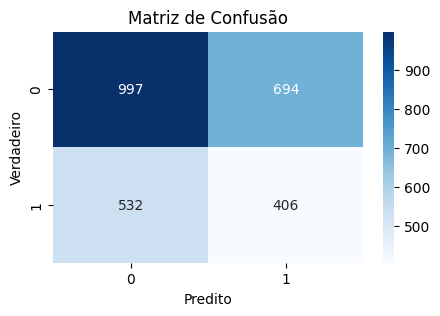

In [ ]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Plotando a matriz de confusão com Seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

## Após algumas tentativas de aperfeiçoar o recall, revisamos a seção de discussões no Kaggle e notamos que outros usuários enfrentavam a mesma dificuldade, sem conseguir elevar a métrica acima de 0.60. Foi apontado que, na verdade, os dados foram gerados por inteligência artificial. Ao analisarmos cuidadosamente as informações disponibilizadas no site, confirmamos este problema. Devido a uma falha de atenção nossa, selecionamos um conjunto de dados que não representa a realidade e não mostra correlação entre as variáveis preditoras e o target, o que inviabiliza a implementação do modelo em produção. Portanto, seria necessário recomeçar a modelagem utilizando dados mais robustos e confiáveis.
